In [1]:
import sys
!{sys.executable} -m pip install mysql-connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
from datetime import datetime
import numpy as np
mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)

In [8]:
mycursor = mydb.cursor(dictionary=True)
# = 3200 AND node_id = 3224 AND node_id = 3240 AND node_id = 42787 AND node_id = 45300 AND node_id = 51719 AND node_id = 51751 AND node_id =  AND node_id = 64458
#mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE node_id = 3200 AND x > 0 AND x < 10406 AND y < 5220 AND y > 0 LIMIT 50000");
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-24 13:05:08.078133+00:00' AND timestamp < '2019-09-25 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 "); 
df = pd.DataFrame(mycursor.fetchall())
x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table = pd.DataFrame(columns=list('NTXYZQ'))
table.N = df.node_id
table.T = df.timestamp
table.X = df.x
table.Y = df.y
table.Z = df.z
table.Q = df.q

#kärryt = df.drop(columns=['timestamp', 'z', 'q'])

table['T'] = table['T'].astype(str)
table['T'].dtype
table['T'] = table['T'].str.slice(2, -7)
print(table)

table['T'] = table['T'].astype('datetime64[ns]')
table['T'] = pd.Series(table['T']).dt.round("S")
table['T'] = table['T'].dt.date
table['T'].head()
#kärryt
#print(df.values.tolist())
#df = df.drop(df[(df.x < 1850.0) & (df.y > 3000.0)].index)

           N                           T    X     Y  Z   Q
0      51719  2019-09-24 13:05:10.555608  153  2631  0  53
1      51719  2019-09-24 13:05:11.555657  170  2629  0  50
2      51719  2019-09-24 13:05:13.554065  107  2649  0  49
3      51719  2019-09-24 13:05:14.554038   51  2668  0  48
4      51719  2019-09-24 13:05:24.555276  108  2649  0  59
...      ...                         ...  ...   ... ..  ..
49422  51719  2019-09-25 13:05:03.678712  182  2399  0  52
49423  51719   2019-09-25 13:05:04.67873  170  2401  0  47
49424  51719  2019-09-25 13:05:05.679583  178  2423  0  54
49425  51719  2019-09-25 13:05:06.678718  155  2428  0  55
49426  51719  2019-09-25 13:05:07.678756  165  2420  0  74

[49427 rows x 6 columns]


0    2019-09-24
1    2019-09-24
2    2019-09-24
3    2019-09-24
4    2019-09-24
Name: T, dtype: object

In [171]:
'''
x_pairs_y = zip([0]+x, x, y)
new_xy = (xxy[1:] for xxy in x_pairs_y if abs(xxy[0]-xxy[1]) <= 10)
new_x, new_y = zip(*new_xy)
print(new_xy)
'''
'''
x = df.x.tolist()
y = df.y.tolist()
list(filter((0).__ne__, df.x))
list(filter((0).__ne__, df.y))
xy = zip(x, y)
new_xy = ((a, b) for a, b in xy if abs(a-b) <= 10)
x, y = zip(*new_xy)
'''
'''
x_pairs_y = zip([0]+x, x, y)
new_xy = (xxy[1:] for xxy in x_pairs_y if abs(xxy[0]-xxy[1]) <= 10)
new_x, new_y = zip(*new_xy)
print(new_xy)
'''

'''
from collections import Counter
def Dublicates(x):
    elements = dict()
    for elem in elements:
        if elem in elements:
            elements[elem] += 1
        else:
            elements[elem] = 1    
 
    elements = { key:value for key, value in elements.items() if value > 1}
    return elements

elements = dict(Counter(new_x))

elements = { key:value for key, value in elements.items() if value > 1}
 
for key, value in elements.items():
    print('x: arvo', key,'esiintyy', value, 'kertaa')
    
for key, value in elements.items():
    if value > 70:
        value = 1
    print('x: arvo',key,'esiintyy', value, 'kertaa')'''

"\nfrom collections import Counter\ndef Dublicates(x):\n    elements = dict()\n    for elem in elements:\n        if elem in elements:\n            elements[elem] += 1\n        else:\n            elements[elem] = 1    \n \n    elements = { key:value for key, value in elements.items() if value > 1}\n    return elements\n\nelements = dict(Counter(new_x))\n\nelements = { key:value for key, value in elements.items() if value > 1}\n \nfor key, value in elements.items():\n    print('x: arvo', key,'esiintyy', value, 'kertaa')\n    \nfor key, value in elements.items():\n    if value > 70:\n        value = 1\n    print('x: arvo',key,'esiintyy', value, 'kertaa')"

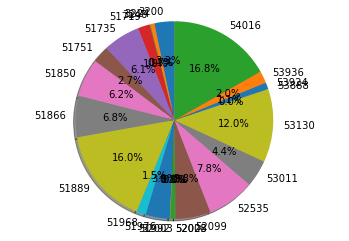

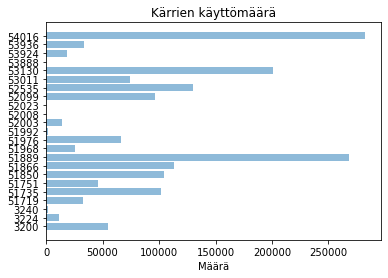

In [2]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, COUNT(node_id) FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-29 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id ");
nodes = pd.DataFrame(mycursor.fetchall())
nodes

nodes = nodes.rename(columns={'COUNT(node_id)': 'amount'})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = nodes.node_id
sizes = nodes.amount
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


objects = nodes.node_id
y_pos = np.arange(len(objects))
performance = nodes.amount

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Määrä')
plt.title('Kärrien käyttömäärä')

plt.show()

In [9]:

#df['x, y'] = df['x, y'].str.replace('', '')
list(filter((0).__ne__, df.x))
list(filter((0).__ne__, df.y))

prev = 0
val = 0
def calc_velocity(time_start, time_end):
    #diff_time = time_start - time_end
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 1
x = 0
for i in range(len(df.x)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(df.x)):
        #print(i , " " , x, " ", len(df.x))
        value1 = calc_velocity(df.iloc[i-x, 1], df.iloc[i-(1+x), 1])
        value2 = int((abs(df.iloc[i-x, 2])) - prev)
        val =  value2 / value1
        if (val > 60 or value2 > 100):
            df.drop([df.index[i-x]], axis = 0, inplace = True)
            prev = abs(df.iloc[i-x, 2])
            x +=1
        else:
            prev = abs(df.iloc[i-x, 2])
x = 0
for i in range(len(df.y)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(df.y)):
        value1 = calc_velocity(df.iloc[i-x, 1], df.iloc[i-(1+x), 1])
        value2 = int((abs(df.iloc[i-x, 3]))-prev)
        val = value2 / value1    
        if (val > 60 or value2 > 100):
            df.drop([df.index[i-x]], axis = 0)
            prev = abs(df.iloc[i-x , 3])
            x +=1
        else:
            prev = abs(df.iloc[i-x, 3])
    #print(prev)
    #if (abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3]))) > 400:
        #print("We int")
        
print(len(df.x))
#devx = [df.iloc[i + 1, 2] - df.iloc[i, 2] for i in range(len(df.x)-1)]
devx = []
for i in range(len(df.x)):
    value1 = calc_velocity(df.iloc[i, 1], df.iloc[i-1, 1])
    val = int((abs(df.iloc[i, 2]) - prev)) / value1
    #print(val)
    devx.append(val)
    prev = abs(df.iloc[i, 2])

xmean = np.mean(devx, axis=0)
xsd = np.std(devx, axis=0)
print(xmean)
print(xsd)
i = 0
final_list = [x for x in df.x if (abs(x) > xmean - 0.5 * xsd)]
#final_list = [x for x in final_list if (x < xmean + 0. * xsd)]
for x in final_list:
    if(x < xmean + 6.75 * xsd):
        df.drop([df.index[i]], axis = 0, inplace = True)
        i -= 1
    i += 1
i = 0
#devy = [df.iloc[i + 1, 3] - df.iloc[i, 3] for i in range(len(df.y)-1)]
devy = []
for i in range(len(df.y)):
    value1 = calc_velocity(df.iloc[i, 1], df.iloc[i-1, 1])
    val = int((abs(df.iloc[i, 3]) - prev)) / value1
    #print(val)
    devy.append(val)
    prev = abs(df.iloc[i, 3])
ymean = np.mean(devy, axis=0)
ysd = np.std(devy, axis=0)
print(ymean)
print(ysd)
final_list1 = [y for y in df.y if (abs(y) > ymean - 0.5 * ysd)]
#final_list = [y for y in final_list if (y < ymean + 0.2 * ysd)]
i = 0
print(len(df.y))
for y in final_list1:
    if(y < ymean + 6.75 * ysd):
        df.drop([df.index[i]], axis = 0, inplace = True)
        i -= 1
    i += 1
    
'''
j = 0
i = 0
for x in df.x:
        if(x > 4000.0):
            df.drop([df.index[j]], axis = 0, inplace = True)
            for x in df.x:
                if(x < 300.0):
                    df.drop([df.index[i]], axis = 0, inplace = True)
                    i -= 1
                i += 1
            j -= 1
        j += 1
'''

#plt.scatter(df.x, df.y)

#img = plt.imread("pic.png")
#fig, ax = plt.subplots()
#ax.imshow(img, extent=[df.x.max(), 0,df.y.max(), 0])
#ax.plot(df.x, df.y, '--', linewidth=1, color='firebrick')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':


45240
-3.529982211587552
40.88475690303448
-0.5602347261338697
109.56494232362718
1827


'\nj = 0\ni = 0\nfor x in df.x:\n        if(x > 4000.0):\n            df.drop([df.index[j]], axis = 0, inplace = True)\n            for x in df.x:\n                if(x < 300.0):\n                    df.drop([df.index[i]], axis = 0, inplace = True)\n                    i -= 1\n                i += 1\n            j -= 1\n        j += 1\n'

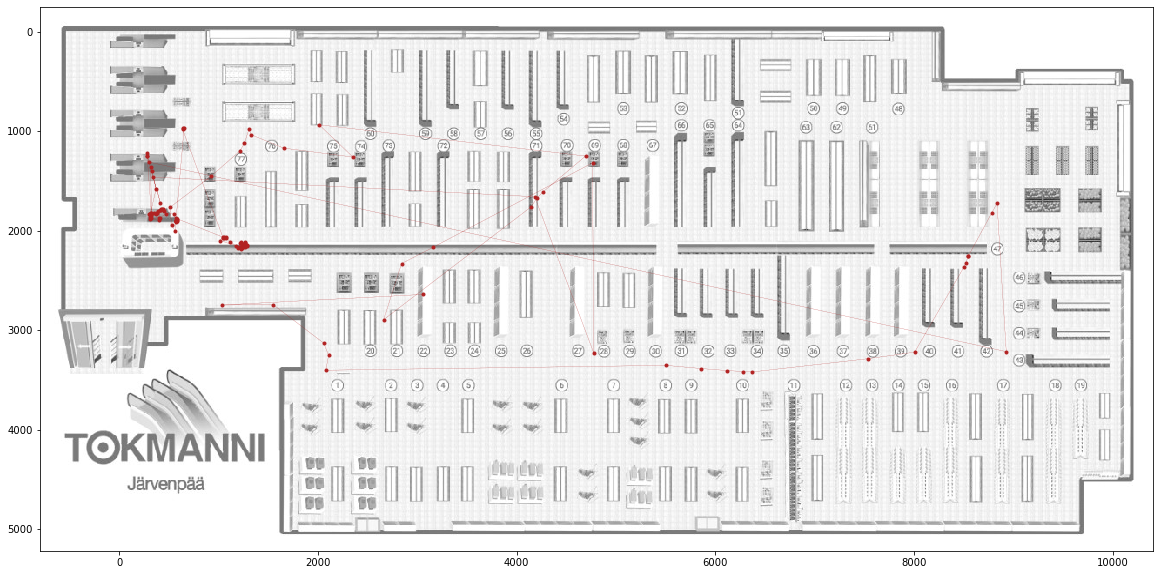

In [10]:
df = df.drop(df[(df.x < 1000.0) & (df.y > 2000.0)].index)
df = df.drop(df[(df.x > 9000.0)].index)
plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
#imgplot = plt.imshow(img, extent = (-700, 10406, 5224, -250))
ax.imshow(img, extent=[-800, 10400, 5220, -250])
#linestyle='dashed'
ax.plot(df.x, df.y , marker='o', linewidth=0.2, markersize=3, color='firebrick')

In [4]:
#table1 = table.loc[table['T'] <= ts2, :]
table1 = table[table['T'] != ts2]
print(table1)

            N          T    X     Y  Z   Q
0       51719 2019-09-24  153  2631  0  53
1       51719 2019-09-24  170  2629  0  50
2       51719 2019-09-24  107  2649  0  49
3       51719 2019-09-24   51  2668  0  48
4       51719 2019-09-24  108  2649  0  59
...       ...        ...  ...   ... ..  ..
126094  51719 2019-09-02  848  1272  0  33
126458  51719 2019-09-02  175  1290  0  47
126462  51719 2019-09-02  127  1288  0  43
126482  51719 2019-09-02   87  1314  0  38
126525  51719 2019-09-02  262  1176  0  66

[119179 rows x 6 columns]


In [41]:
table2 = table.loc[table['T'] >= ts2, :]
print(table2)

            N          T    X     Y  Z   Q
119112  51719 2019-09-27  246  1117  0  74
119113  51719 2019-09-27  341  1459  0  36
119114  51719 2019-09-27  242  1103  0  49
119115  51719 2019-09-27  242  1103  0  82
119116  51719 2019-09-27  893  3445  0  84
...       ...        ...  ...   ... ..  ..
126539  51719 2019-09-27  950  3650  0  45
126540  51719 2019-09-27  950  3650  0  58
126541  51719 2019-09-27  950  3650  0  58
126542  51719 2019-09-27  949  3649  0  67
126543  51719 2019-09-27  949  3649  0  21

[7365 rows x 6 columns]


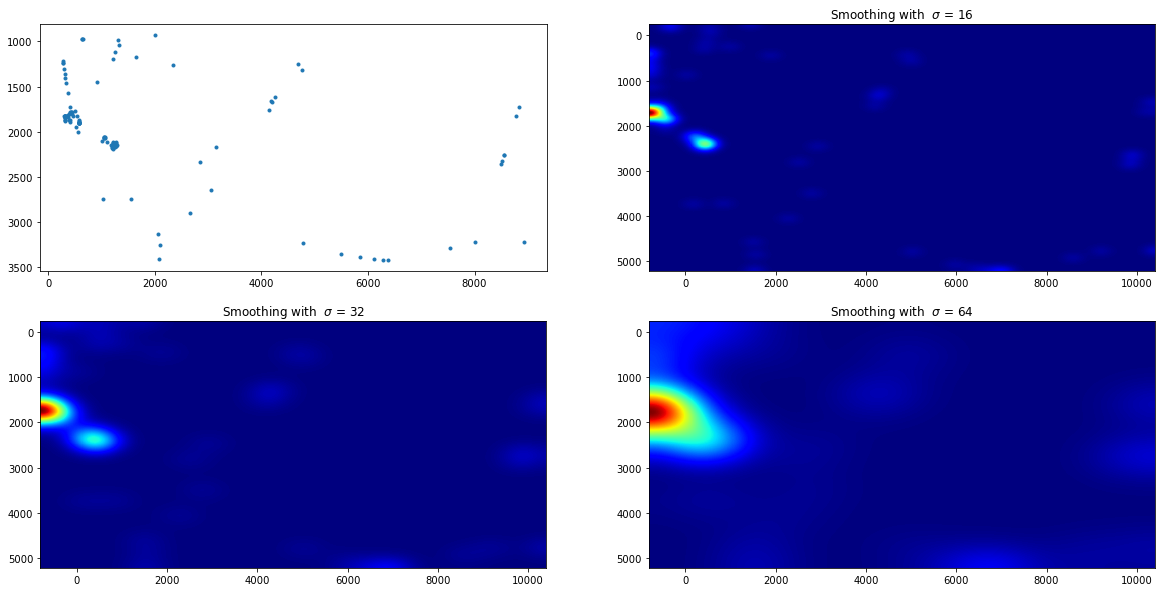

In [12]:
import seaborn as sns
from scipy import stats, integrate
#x = df.x.tolist()
#y = df.y.tolist()

#ax = sns.kdeplot(x, bw=.15)
'''
b = [*range(-175, 1000)]
del x[1:90000]
g = 0
while True:
    c = [i for i in x if i not in b]
    del x[i]
    g += 1
    if g >= 1000:
        break
print(c)
'''

from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm

x = df.x.tolist()
y = df.y.tolist()


def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return heatmap.T, extent

extent=[-800, 10400, 5220, -250]
img2 = img
fig, axs = plt.subplots(2, 2)

sigmas = [0, 16, 32, 64]
for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.invert_yaxis()
        ax.plot(x, y, 'o', linewidth=0.2, markersize=3)
    else:
        img2, extent = myplot(x, y, s)
        ax.imshow(np.flipud(img2), extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()


In [ ]:
#table2 = table.loc[table['T'] >= ts2, :]
'''
i = i.strftime("%d")
for i in table['T']:
    if i > ts:
        [row for row in table if row[1] != ts]
'''
#table.drop(ts, 0, inplace = True)
print(table)
table.dtypes



tripEnd =[] 
print(tripEnd)
started = False
bol = False
for i in range(len(df)):
    #print(data.loc[data.index[i], 'x'],data.loc[data.index[i],'y'])
    if((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[df.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 0.0) & (df.loc[df.index[i],'y'] < 2199) &  started):
        tripEnd.append(i)
        #print(started)
        started = False
        #print("end")
    elif(((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[df.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 2200) & (df.loc[df.index[i],'y'] < 3100)) & (not started)):
        #print(started)
        started = True
        #print("start")
        
        
        
j1 = 0
for j in tripEnd:
    ax.plot(df.loc[j1:j,'x'],df.loc[j1:j,'y'] , linewidth=1, color=(rnd.randint(0,255),rnd.randint(0,255),rnd.randint(0,255)) )
    j1 = j +1

ax.imshow(img1, extent=[-800, 10400, 5400, -200])
plt.show()
print("HE")
print(tripEnd)
print(df.loc[df.index[1], 'x'])
fig, ax = plt.subplots()
prev = 0
ax.imshow(img1, extent=[-800, 10400, 5400, -200])
#print(tripEnd)
for j in tripEnd:
    #print(j)
    ax.plot(df.loc[prev:j,'x'],df.loc[prev:j,'y'] , linewidth=0.6, color=np.random.rand(3,) )
    prev = j 



table1 = table.loc[table['T'] <= ts2, :]
#table1 = table[table['T'] != ts2]
print(table1)


table2 = table.loc[table['T'] >= ts2, :]
print(table2)


mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-10-01 00:00:00.000000+00:00' AND timestamp < '2019-10-31 00:00:00.000000+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 ");

outlayers = pd.DataFrame(mycursor.fetchall())
outlayers = outlayers.drop(outlayers[(outlayers.x > 1000.0) & (outlayers.y < 2000.0)].index)

outlayers = outlayers.drop(outlayers[(outlayers.x < 9000)].index)

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
O_table = pd.DataFrame(columns=list('NTXYZQ'))
O_table.N = outlayers.node_id
O_table.T = outlayers.timestamp
O_table.X = outlayers.x
O_table.Y = outlayers.y
O_table.Z = outlayers.z
O_table.Q = outlayers.q


O_table['T'] = O_table['T'].astype(str)
O_table['T'] = O_table['T'].str.slice(2, -15)

O_table['T'] = pd.to_datetime(O_table['T'], errors='coerce')
O_table['T'] = O_table['T'].dt.normalize()

print(O_table)

from datetime import date, timedelta
d = 0
dates = []

start_date = date(2019, 10, 1)
end_date = date(2019, 10, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    ts = start_date.strftime("%Y/%m/%d")
    start_date += delta
    d += 1
    dates.append(ts)
    print(d, ts)
print(dates)

from matplotlib.pyplot import cm
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


n = len(dates)
colors=iter(cm.rainbow(np.linspace(0,1,n)))

plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
#imgplot = plt.imshow(img, extent = (-700, 10406, 5224, -250))
ax.imshow(img, extent=[-800, 10400, 5220, -250])

#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'c', 'm','lime', 'b', 'darkorange', 'g'])))
for i in dates:
    tsT = O_table.loc[O_table['T'] == i, :]
    c=next(colors)
    for i in range(n):
        plt.plot(tsT.X, tsT.Y, color=c)
plt.show()

'''
ax.plot(table1.X, table1.Y, marker='o', linewidth=0.2, markersize=3, color='r')
ax.plot(table2.X, table2.Y , marker='', linewidth=1, markersize=3, color='y')
ax.plot(table3.X, table3.Y , marker='', linewidth=1, markersize=3, color='b')
ax.plot(table4.X, table4.Y , marker='', linewidth=1, markersize=3, color='darkorange')
ax.plot(table5.X, table5.Y , marker='', linewidth=1, markersize=3, color='g')
ax.plot(table6.X, table6.Y , marker='', linewidth=1, markersize=3, color='c')
ax.plot(table7.X, table7.Y , marker='', linewidth=1, markersize=3, color='peru')
'''




#df = df.drop(df[(df.x < 1000.0) & (df.y < 7000.0)].index)
#df.assign(x = df.x.mul(-1))
#df.assign(y = df.y.mul(-1))
#table['T'] = dateutil.parser.parse(table['T']).date()
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-24 00:00:00.000000+00:00' AND timestamp < '2019-09-25 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times1 = pd.DataFrame(mycursor.fetchall())

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table1 = pd.DataFrame(columns=list('TXY'))
table1.T = times1.timestamp
table1.X = times1.x
table1.Y = times1.y
table1

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-25 00:00:00.000000+00:00' AND timestamp < '2019-09-26 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times2 = pd.DataFrame(mycursor.fetchall())
times2

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table2 = pd.DataFrame(columns=list('TXY'))
table2.T = times2.timestamp
table2.X = times2.x
table2.Y = times2.y
table2

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-26 00:00:00.000000+00:00' AND timestamp < '2019-09-27 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times3 = pd.DataFrame(mycursor.fetchall())
times3

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table3 = pd.DataFrame(columns=list('TXY'))
table3.T = times3.timestamp
table3.X = times3.x
table3.Y = times3.y
table3

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-27 00:00:00.000000+00:00' AND timestamp < '2019-09-28 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times4 = pd.DataFrame(mycursor.fetchall())
times4

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table4 = pd.DataFrame(columns=list('TXY'))
table4.T = times4.timestamp
table4.X = times4.x
table4.Y = times4.y
table4

table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].astype(str), table2['T'].astype(str), table3['T'].astype(str), table4['T'].astype(str)
table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].str.slice(2, -15), table2['T'].str.slice(2, -15), table3['T'].str.slice(2, -15), table4['T'].str.slice(2, -15)

#table['T'] = table['T'].astype('datetime64[ns]')
table1['T'], table2['T'], table3['T'], table4['T'] = pd.to_datetime(table1['T'], errors='coerce'), pd.to_datetime(table2['T'], errors='coerce'), pd.to_datetime(table3['T'], errors='coerce'), pd.to_datetime(table4['T'], errors='coerce')
table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].dt.normalize(), table2['T'].dt.normalize(), table3['T'].dt.normalize(), table4['T'].dt.normalize()
#table['T'] = pd.Series(table['T']).dt.round("S")
#table['T'] = table['T'].dt.date

times1 = times1.drop(times1[(times1.x < 1000.0) & (times1.y > 2000.0)].index)
times1 = times1.drop(times1[(times1.x > 9000.0)].index)

times2 = times2.drop(times2[(times2.x < 1000.0) & (times2.y > 2000.0)].index)
times2 = times2.drop(times2[(times2.x > 9000.0)].index)

times3 = times3.drop(times3[(times3.x < 1000.0) & (times3.y > 2000.0)].index)
times3 = times3.drop(times3[(times3.x > 9000.0)].index)

times4 = times4.drop(times4[(times4.x < 1000.0) & (times4.y > 2000.0)].index)
times4 = times4.drop(times4[(times4.x > 9000.0)].index)